数据集包含沃尔玛的销售数据。
变量含义：
- Store：店铺编号
- Date：销售周
- Weekly_Sales：店铺在该周的销售额
- Holiday_Flag：是否为假日周
- Temperature：销售日的温度
- Fuel_Price：该地区的燃油成本
- CPI（消费者物价指数）：消费者物价指数
- Unemployment：失业率

## 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或者 'Microsoft YaHei'
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [3]:
walmart_origin_data = pd.read_csv("walmart_stores_data.csv")
walmart_origin_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 评估和清洗数据

In [4]:
walmart_cleaned_data=walmart_origin_data.copy()

### 数据整齐度

In [5]:
walmart_cleaned_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [6]:
walmart_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


从结果来看，walmart_cleaned_data共有6435条数据，变量不存在缺失值

In [7]:
walmart_cleaned_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 探索数据

In [8]:
sns.set_palette("pastel")

#### 探究失业率对销售额的影响

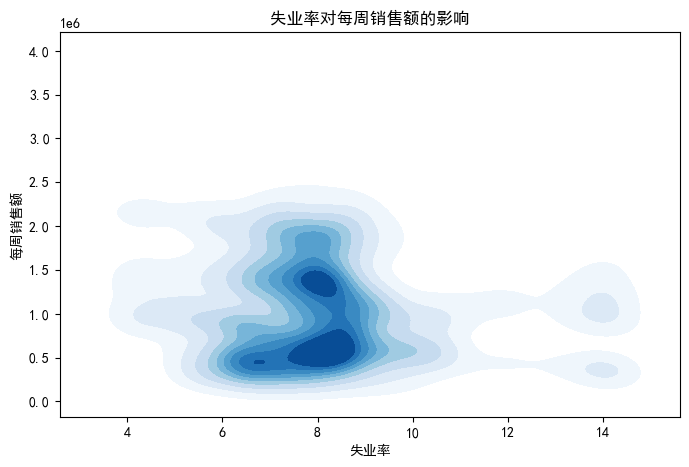

In [9]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=walmart_cleaned_data, x='Unemployment', y='Weekly_Sales', cmap='Blues', fill=True)
plt.title('失业率对每周销售额的影响')
plt.xlabel('失业率')
plt.ylabel('每周销售额')
plt.show()

由图中可见，失业率在8时店铺的销售额最高

#### 探索消费者物价指数对店铺在该周的销售额的影响

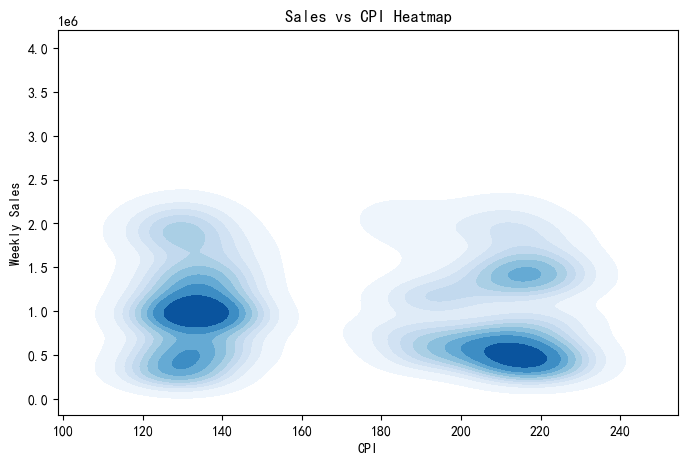

In [10]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=walmart_cleaned_data, x='CPI', y='Weekly_Sales', cmap='Blues', fill=True)
plt.title('Sales vs CPI Heatmap')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

#### 探索假日效应

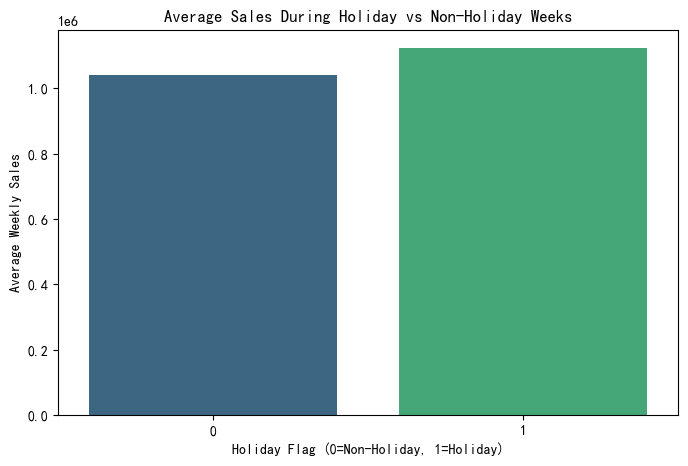

In [11]:
avg_sales_by_holiday = walmart_cleaned_data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales_by_holiday, x='Holiday_Flag', y='Weekly_Sales', palette='viridis')
plt.title('Average Sales During Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Flag (0=Non-Holiday, 1=Holiday)')
plt.ylabel('Average Weekly Sales')
plt.show()

#### 燃油价格对销售额的影响

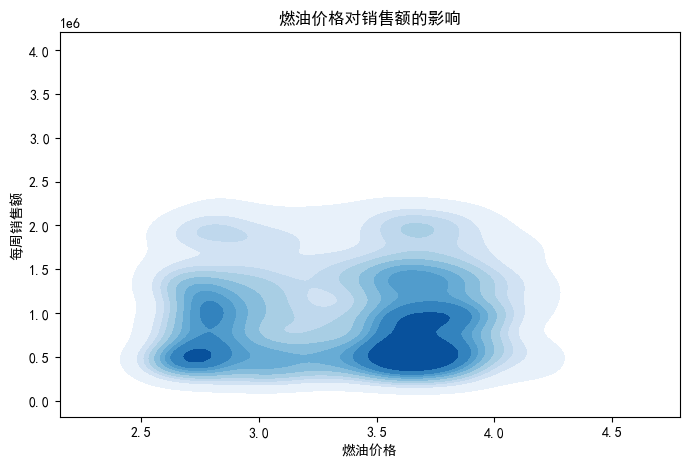

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=walmart_cleaned_data, x='Fuel_Price', y='Weekly_Sales', cmap='Blues', fill=True)
plt.title('燃油价格对销售额的影响')
plt.xlabel('燃油价格')
plt.ylabel('每周销售额')
plt.show()

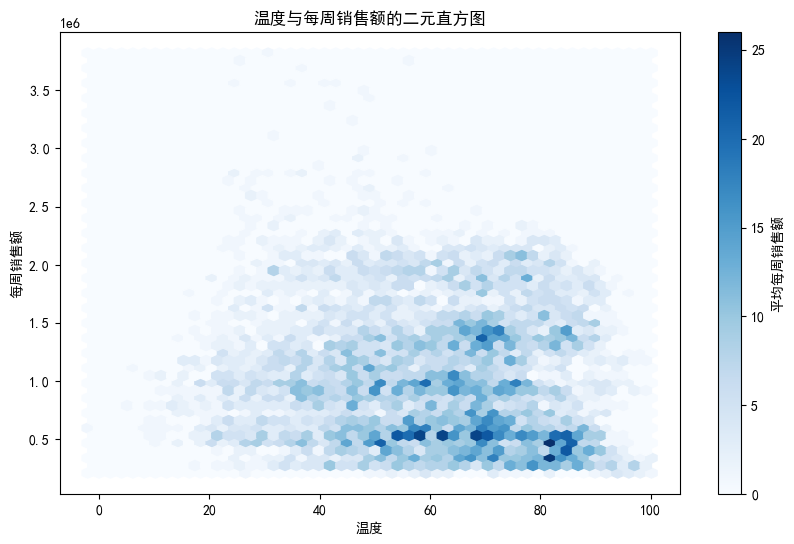

In [14]:
plt.figure(figsize=(10, 6))
plt.hexbin(walmart_cleaned_data['Temperature'], walmart_cleaned_data['Weekly_Sales'], gridsize=50, cmap='Blues', reduce_C_function=np.mean)
plt.colorbar(label='平均每周销售额')
plt.title('温度与每周销售额的二元直方图')
plt.xlabel('温度')
plt.ylabel('每周销售额')
plt.show()